In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset

df = pd.read_csv('/kaggle/input/datacustomer/Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})

In [7]:
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


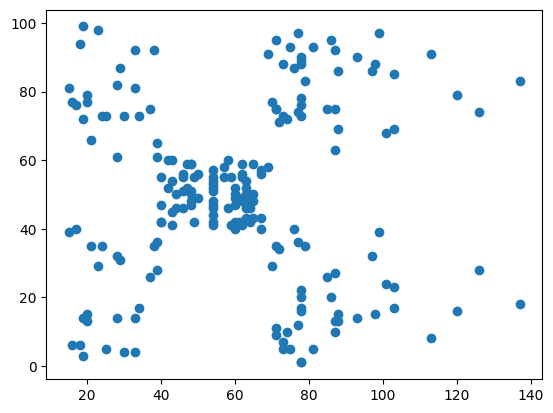

In [8]:
plt.scatter(df['Annual_Income'],df['Spending_Score'])

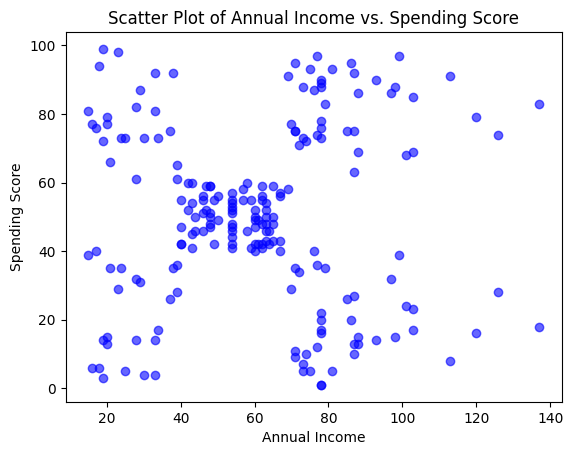

In [12]:
# Alternate way

# Ensure both columns are properly selected
plt.scatter(df['Annual_Income'], df['Spending_Score'], color='blue', alpha=0.6)

# Add labels and a title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Annual Income vs. Spending Score')

# Display the plot
plt.show()


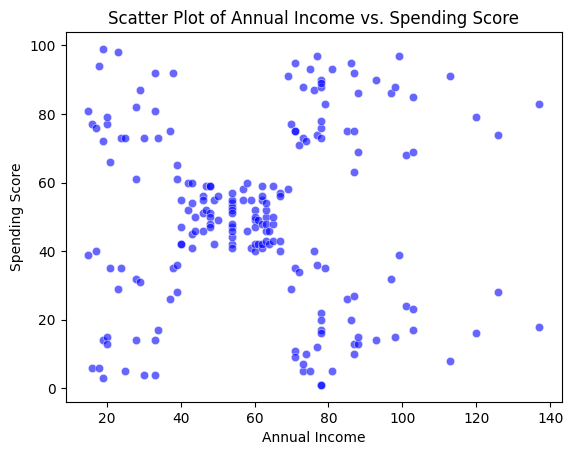

In [13]:
import seaborn as sns

sns.scatterplot(
    data=df, x='Annual_Income', y='Spending_Score', color='blue', alpha=0.6
)

plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [14]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Why We Use Each Step

Import MinMaxScaler:

MinMaxScaler is a preprocessing technique that scales features to a specific range, typically [0, 1].
Why?: Ensures all features have the same scale, improving the performance of machine learning algorithms sensitive to feature magnitud
es.
Initialize the Scaler:

Creates an instance of the scaler to apply to your data.
Why?: Keeps the process modular and allows reuse for other columns if 
needed.
Fit the Scaler:

Calculates the min and max values of the feature to be scaled.
Why?: These values are required for scaling, ensuring all future transformations use consistent scaling 
parameters.
Transformthe Column:

Applies the scaling formula to convert the values in the Annual_Income column to the range [0, 1].
Why?: Normalizes the data, making it suitable for algorithms that are sensitive to feature ranges (e.g., K-Means, SVM, Gra
dient Descent).
Why Scal
ing is Importnt
Consistency:

Features with different scales can bias machine learning models. Scaling ensures all features 
contribute equally.
Iproves Convergence:

For algorithms like Gradient Descent, scaling accelerates convergence by n
ormalizing step sizes.
Handls Feature Sensitivity:

Clustering and distance-based algorithms like K-Means or K-Nearest Neighbors rely on consistent feature scales for accurate results.

1. When to Use MinMaxScaler
MinMaxScaler scales your data to a specified range, typically [0, 1] (or any custom range you specify).

You should use MinMaxScaler if:

a. Your Data Contains Features with Different Ranges
Problem: Features with larger ranges dominate those with smaller ranges.
Example: Annual income ([20,000 - 1,000,000]) vs. age ([18 - 70]).
MinMaxScaler ensures all features are scaled proportionally within the same range.
b. The Algorithm is Sensitive to Feature Magnitudes
Algorithms that rely on distance metrics or gradient calculations are sensitive to feature scales:

Distance-Based Algorithms:
K-Means Clustering
K-Nearest Neighbors (KNN)
Support Vector Machines (SVM)
Gradient-Based Algorithms:
Neural Networks
Linear Regression with Gradient Descent
Why?: These algorithms assume features are on the same scale. Larger-scale features can bias the results.
c. Your Data Doesn't Contain Outliers
MinMaxScaler is sensitive to outliers because it uses the minimum and maximum values to scale the data.
If outliers exist: Consider using RobustScaler or standardizing the data with StandardScaler instead.
2. How to Identify the Need for Scaling
a. Explore the Data
Use describe() to identify feature ranges:

=================================================================================
print(df.describe())
Look for significant differences in min, max, or std values between features.
Example:
      Annual_Income   Spending_Score
count     200.000000      200.000000
mean    65000.000000       50.000000
std     45000.000000       20.000000
min     15000.000000       10.000000
max    125000.000000       90.000000


Observation:
Annual income has a large range ([15,000 - 125,000]).
Spending score has a smaller range ([10 - 90]).
Conclusion: Apply MinMaxScaler to normalize these ranges.
b. Plot the Data
Visualize the distributions of features:

import seaborn as sns
sns.boxplot(data=df[['Annual_Income', 'Spending_Score']])
Wide range in features → Use MinMaxScaler.
Presence of outliers → Use RobustScaler instead.
3. Compare Alternatives
Use MinMaxScaler when:

You want the data in a specific range (e.g., [0, 1]) for better interpretability.
Your data doesn't have outliers that could distort the scaling.
Other Scalers:

StandardScaler:
Standardizes data to have mean 0 and standard deviation 1.
Use for algorithms like PCA or SVM.
RobustScaler:
Handles outliers better by scaling based on the interquartile range (IQR).
4. Test the Impact
Always test how scaling affects your model:

Train and evaluate your model before and after scaling.
Example:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
model_original = RandomForestClassifier().fit(X_train, y_train)
model_scaled = RandomForestClassifier().fit(X_train_scaled, y_train)

# Compare performance
print("Original Accuracy:", model_original.score(X_test, y_test))
print("Scaled Accuracy:", model_scaled.score(X_test_scaled, y_test))
Conclusion
Use MinMaxScaler when:

Features have different ranges.
The algorithm is sensitive to feature magnitude.
Your data doesn't contain significant outliers.

In [15]:
# Import the MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler scales values to a range (default: 0 to 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()  # Create an instance of MinMaxScaler

# Fit the scaler to the 'Annual_Income' column
scaler.fit(df[['Annual_Income']])  
# Why? Fitting calculates the minimum and maximum values of 'Annual_Income', 
# which are needed for the scaling formula: 
# Scaled_Value = (Value - Min) / (Max - Min).

# Transform the 'Annual_Income' column
df['Annual_Income'] = scaler.transform(df[['Annual_Income']])  
# Why? The transform step applies the scaling formula to each value in the 'Annual_Income' column, 
# rescaling it to the range [0, 1].

# Result: The 'Annual_Income' column values are now scaled between 0 and 1.


In [16]:
# Fit the MinMaxScaler to the 'Spending_Score' column
scaler.fit(df[['Spending_Score']])  
# Why? The `fit()` method calculates the minimum and maximum values of the 'Spending_Score' column.
# These values are needed to scale the data to the desired range (default is [0, 1]).
# Double brackets (`[['Spending_Score']]`) are used to select the column as a DataFrame, not a Series.
# MinMaxScaler expects a 2D array-like structure (DataFrame or numpy array), 
# and double brackets ensure the selection is in 2D format.

# Transform the 'Spending_Score' column using the scaler
df['Spending_Score'] = scaler.transform(df[['Spending_Score']])  
# Why? The `transform()` method applies the scaling formula to each value in 'Spending_Score':
# Scaled_Value = (Value - Min) / (Max - Min)
# This rescales the 'Spending_Score' values to the range [0, 1].
# The transformed values overwrite the original column for consistency.

# Example:
# If 'Spending_Score' had values [10, 50, 90], and min=10, max=90:
# Scaled values = [(10-10)/(90-10), (50-10)/(90-10), (90-10)/(90-10)] = [0.0, 0.5, 1.0]


In [17]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [19]:
# Extracting the 3rd and 4th features from the dataset
x = df.iloc[:, [3, 4]].values  
# Why? 
# - `iloc` is used to select data based on integer-based indexing.
# - `[:, [3, 4]]` selects all rows (:) and the 3rd and 4th columns (index positions 3 and 4).
# - These features are typically chosen based on their relevance to the problem, such as clustering or regression.
# - Example: In customer segmentation, these might represent 'Annual Income' and 'Spending Score' which are important for segmentation.

# Converting the selected features into a NumPy array
# Why? 
# - `.values` converts the DataFrame subset into a NumPy array.
# - Many machine learning algorithms (e.g., clustering, regression) require input in the form of a NumPy array.
# - This step ensures compatibility with such algorithms.


In [20]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

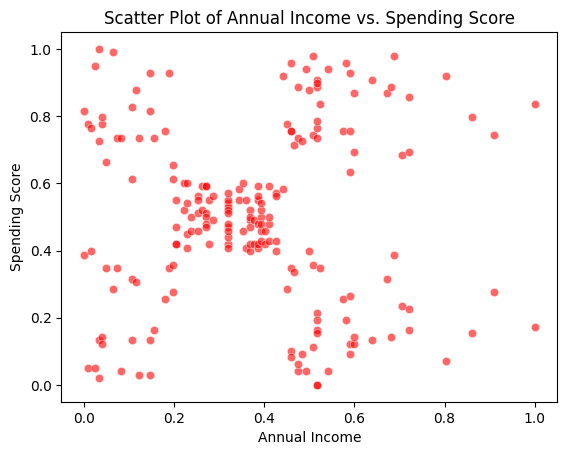

In [21]:
sns.scatterplot(
    data=df, x='Annual_Income', y='Spending_Score', color='red', alpha=0.6
)

plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

What is the Elbow Method?
The Elbow Method is a technique used to determine the optimal number of clusters (n_clusters) in K-Means clustering. It plots the Within-Cluster Sum of Squares (WCSS) for different values of n_clusters. The point where the WCSS decreases sharply (forming an "elbow" shape) is considered the optimal number of clusters.

What is WCSS?
Within-Cluster Sum of Squares (WCSS) measures the sum of squared distances between each data point in a cluster and the cluster's centroid. It represents how compact the clusters are:

Lower WCSS → Better clustering (data points are close to their cluster centroids).
WCSS decreases as n_clusters increases but has diminishing returns.

In [22]:
from sklearn.cluster import KMeans  # Import KMeans for clustering analysis

# Initialize an empty list to store WCSS values
wcss = []  
# Why? WCSS will store the Within-Cluster Sum of Squares for each value of `n_clusters`.

# Loop over a range of cluster numbers to evaluate WCSS
for i in range(1, 21):  # Test cluster counts from 1 to 20
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)  
    # Why? The `random_state` ensures reproducibility of the results.

    # Fit KMeans to the dataset
    kmeans.fit(x)  
    # Why? This step calculates cluster centroids and assigns data points to clusters.

    # Append the WCSS (inertia) for the current number of clusters
    wcss.append(kmeans.inertia_)  
    # Why? `kmeans.inertia_` computes the WCSS value, representing how compact the clusters are.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

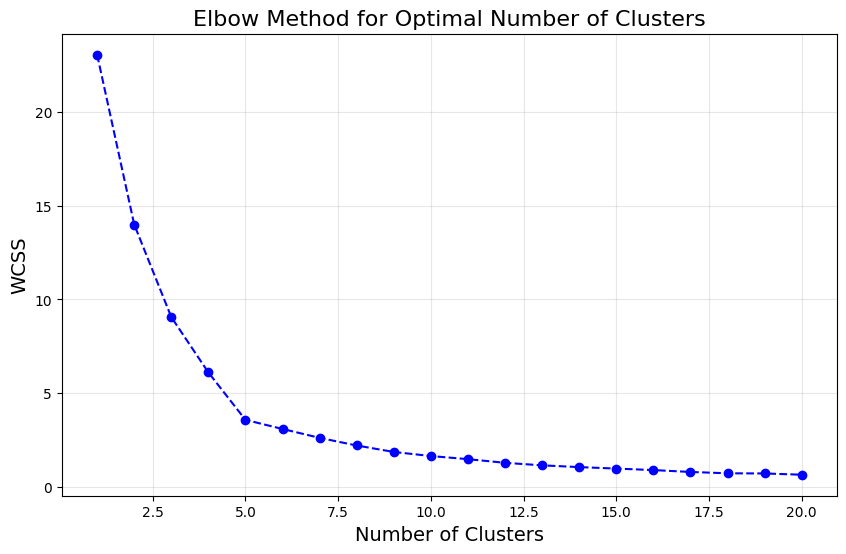

In [23]:
# Plot the WCSS values to visualize the Elbow Method
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(range(1, 21), wcss, marker='o', linestyle='--', color='blue')  
# Why? Plots WCSS values against the number of clusters (1 to 20).

# Add labels and a title
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)  # Add a descriptive title
plt.xlabel('Number of Clusters', fontsize=14)  # Label the x-axis as 'Number of Clusters'
plt.ylabel('WCSS', fontsize=14)  # Label the y-axis as 'WCSS'

# Display the plot
plt.grid(alpha=0.3)  # Add gridlines for easier interpretation of the plot
plt.show()  # Render the plot


Explanation of What We Are Doing and Why
Why Test Multiple Clusters (range(1, 21)):

To determine the optimal number of clusters using the Elbow Method.
Testing values from 1 to 20 ensures we can observe the WCSS trend and identify the elbow point.
Why Use WCSS (kmeans.inertia_):

WCSS measures how compact the clusters are.
The goal is to minimize WCSS while avoiding overfitting with too many cl
usters.
Plott<br>ing WCSS:

The plot helps visualize where the WCSS reduction slows down (th<br>e "elbow").
The elbow point represents the optimal trade-off between minimizing WCSS and avoiding unnecessary<br> complexity.
How to Identify the Optimal Number of Clusters
Look at the plot generated by the Elbow Method.
Identify the "elbow" point — where the WCSS stops decreasing<br> significantly.
For example, if the curve flattens after n_clusters=3, this is likely the optimal num<br>b
er of clusters.
Result
The Elbow Method helps select the best number of clusters for your data by balancing compactness (low WCSS) and simplicity ion or assistance!

In [24]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans  # Import the KMeans class for clustering data into groups

# Initialize a KMeans model with a predefined number of clusters
k_mean = KMeans(n_clusters=5)  
# Why? 
# - `n_clusters=5`: Specifies the number of clusters to create (5 in this case).
# - KMeans algorithm partitions the data into 5 clusters based on similarity.
# - The number of clusters is often chosen based on domain knowledge or using methods like the Elbow Method.
# - At this point, the KMeans object is initialized but not yet fitted to the data.


In [25]:
# Fit the KMeans model to the dataset and assign cluster labels to each data point
Label_0r_Predicted = k_mean.fit_predict(x)  
# Why? 
# - `fit_predict(x)` does two things:
#   1. Fits the KMeans model to the input data `x`:
#      - The model identifies `n_clusters` (5 in this case) centroids and assigns data points to the nearest centroid.
#   2. Predicts cluster labels for each data point in `x`:
#      - Assigns each data point to a cluster (output is an array of labels, e.g., `[0, 1, 2, 0, 1...]`).
# - The resulting labels indicate which cluster each data point belongs to.

# Store the predicted cluster labels in `Label_0r_Predicted`
# - `Label_0r_Predicted`: A NumPy array where each element corresponds to the cluster label of a data point.
# - Example: If the data has 100 points and `n_clusters=5`, the array may look like:
#   `[0, 1, 2, 3, 4, 0, 1, 2...]`, meaning the first data point belongs to cluster 0, the second to cluster 1, etc.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
Label_0r_Predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [27]:
# Add the cluster labels to the dataset as a new column
df['cluster'] = Label_0r_Predicted  
# Why? 
# - `Label_0r_Predicted` contains the cluster labels (0, 1, 2, etc.) assigned by the KMeans model.
# - Adding it to the `dataset` allows us to associate each data point with its cluster.
# - This makes it easier to group, analyze, or visualize the data based on clusters.

# Example:
# If `Label_0r_Predicted` is `[0, 1, 2, 0, 1]` and `dataset` has 5 rows:
# The resulting column 'cluster' will look like:
# | Feature1 | Feature2 | cluster |
# |----------|----------|---------|
# |    ...   |    ...   |    0    |
# |    ...   |    ...   |    1    |
# |    ...   |    ...   |    2    |
# |    ...   |    ...   |    0    |
# |    ...   |    ...   |    1    |


In [28]:
df.head(10)

,CustomerID,Genre,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,3


In [31]:
# Filter the dataset to separate rows belonging to each cluster
d_1 = df[df.cluster == 0]  # Select rows where the cluster label is 0
d_2 = df[df.cluster == 1]  # Select rows where the cluster label is 1
d_3 = df[df.cluster == 2]  # Select rows where the cluster label is 2
d_4 = df[df.cluster == 3]  # Select rows where the cluster label is 3
d_5 = df[df.cluster == 4]  # Select rows where the cluster label is 4

# Why? 
# - These steps create separate DataFrames (`d_1`, `d_2`, etc.) for each cluster.
# - Each DataFrame contains only the data points belonging to a specific cluster.
# - This allows detailed analysis, visualization, or reporting for individual clusters.

# Example:
# If the 'cluster' column has values `[0, 1, 2, 0, 1]`:
# - `d_1` will contain rows with cluster `0`.
# - `d_2` will contain rows with cluster `1`.
# - And so on, up to cluster `4`.


In [33]:
d_1.describe()  # Summary statistics for cluster 0


,CustomerID,Age,Annual_Income,Spending_Score,cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,0.586381,0.827839,0.0
std,22.803509,3.728650,0.133709,0.095556,0.0
min,124.000000,27.000000,0.442623,0.632653,0.0
25%,143.000000,30.000000,0.495902,0.750000,0.0
50%,162.000000,32.000000,0.524590,0.836735,0.0
75%,181.000000,35.500000,0.655738,0.908163,0.0
max,200.000000,40.000000,1.000000,0.979592,0.0


In [34]:
print(d_2.describe())  # Summary statistics for cluster 1


       CustomerID        Age  Annual_Income  Spending_Score  cluster
count   81.000000  81.000000      81.000000       81.000000     81.0
mean    86.320988  42.716049       0.330298        0.495087      1.0
std     24.240889  16.447822       0.073673        0.066642      0.0
min     44.000000  18.000000       0.196721        0.336735      1.0
25%     66.000000  27.000000       0.270492        0.438776      1.0
50%     86.000000  46.000000       0.319672        0.500000      1.0
75%    106.000000  54.000000       0.385246        0.551020      1.0
max    143.000000  70.000000       0.500000        0.612245      1.0


In [35]:
print(d_3.describe())  # Summary statistics for cluster 2


       CustomerID        Age  Annual_Income  Spending_Score  cluster
count   35.000000  35.000000      35.000000       35.000000     35.0
mean   164.371429  41.114286       0.600000        0.164431      2.0
std     21.457325  11.341676       0.134419        0.101553      0.0
min    125.000000  19.000000       0.450820        0.000000      2.0
25%    148.000000  34.000000       0.512295        0.091837      2.0
50%    165.000000  42.000000       0.573770        0.153061      2.0
75%    182.000000  47.500000       0.676230        0.229592      2.0
max    199.000000  59.000000       1.000000        0.387755      2.0


In [36]:
print(d_4.describe())  # Summary statistics for cluster 3


       CustomerID        Age  Annual_Income  Spending_Score  cluster
count   22.000000  22.000000      22.000000       22.000000     22.0
mean    23.090909  25.272727       0.087928        0.799629      3.0
std     13.147185   5.257030       0.062022        0.107185      0.0
min      2.000000  18.000000       0.000000        0.612245      3.0
25%     12.500000  21.250000       0.034836        0.734694      3.0
50%     23.000000  23.500000       0.077869        0.775510      3.0
75%     33.500000  29.750000       0.141393        0.864796      3.0
max     46.000000  35.000000       0.196721        1.000000      3.0


In [37]:
print(d_5.describe())  # Summary statistics for cluster 4


       CustomerID        Age  Annual_Income  Spending_Score  cluster
count    23.00000  23.000000      23.000000       23.000000     23.0
mean     23.00000  45.217391       0.092659        0.203194      4.0
std      13.56466  13.228607       0.064703        0.132828      0.0
min       1.00000  19.000000       0.000000        0.020408      4.0
25%      12.00000  35.500000       0.036885        0.086735      4.0
50%      23.00000  46.000000       0.081967        0.163265      4.0
75%      34.00000  53.500000       0.147541        0.331633      4.0
max      45.00000  67.000000       0.196721        0.397959      4.0


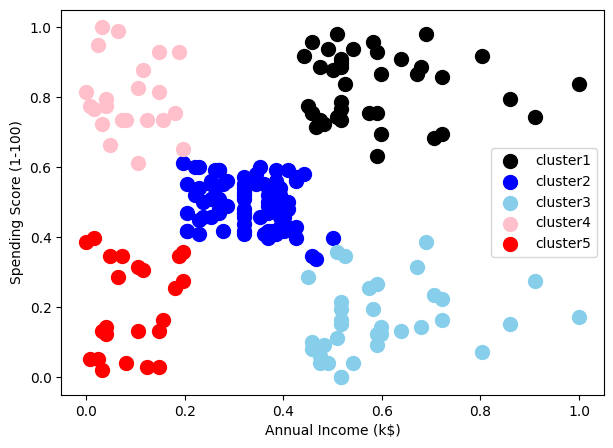

In [38]:
# Set the size of the Matplotlib figure
plt.figure(figsize=(7, 5))  
# Why? Specifies the figure dimensions: 7 inches wide and 5 inches tall for better visualization.

# Scatter plot for cluster 1
plt.scatter(
    d_1['Annual_Income'],  # X-axis: 'Annual_Income' column for cluster 1
    d_1['Spending_Score'],  # Y-axis: 'Spending_Score' column for cluster 1
    c='black',  # Marker color for cluster 1
    s=100,  # Marker size for cluster 1
    label='cluster1'  # Label for cluster 1 (used in the legend)
)

# Scatter plot for cluster 2
plt.scatter(
    d_2['Annual_Income'],  # X-axis: 'Annual_Income' column for cluster 2
    d_2['Spending_Score'],  # Y-axis: 'Spending_Score' column for cluster 2
    c='blue',  # Marker color for cluster 2
    s=100,  # Marker size for cluster 2
    label='cluster2'  # Label for cluster 2 (used in the legend)
)

# Scatter plot for cluster 3
plt.scatter(
    d_3['Annual_Income'],  # X-axis: 'Annual_Income' column for cluster 3
    d_3['Spending_Score'],  # Y-axis: 'Spending_Score' column for cluster 3
    c='skyblue',  # Marker color for cluster 3
    s=100,  # Marker size for cluster 3
    label='cluster3'  # Label for cluster 3 (used in the legend)
)

# Scatter plot for cluster 4
plt.scatter(
    d_4['Annual_Income'],  # X-axis: 'Annual_Income' column for cluster 4
    d_4['Spending_Score'],  # Y-axis: 'Spending_Score' column for cluster 4
    c='pink',  # Marker color for cluster 4
    s=100,  # Marker size for cluster 4
    label='cluster4'  # Label for cluster 4 (used in the legend)
)

# Scatter plot for cluster 5
plt.scatter(
    d_5['Annual_Income'],  # X-axis: 'Annual_Income' column for cluster 5
    d_5['Spending_Score'],  # Y-axis: 'Spending_Score' column for cluster 5
    c='red',  # Marker color for cluster 5
    s=100,  # Marker size for cluster 5
    label='cluster5'  # Label for cluster 5 (used in the legend)
)

# Label the x-axis
plt.xlabel('Annual Income (k$)')  
# Why? Provides a meaningful label for the x-axis to indicate it represents annual income.

# Label the y-axis
plt.ylabel('Spending Score (1-100)')  
# Why? Provides a meaningful label for the y-axis to indicate it represents spending scores.

# Add a legend to identify clusters by color
plt.legend()  
# Why? Displays a legend to map colors to their respective clusters, improving interpretability.

# Display the scatter plot
plt.show()  
# Why? Renders the plot with all specified settings and customizations.


In [39]:
# Access the cluster centroids determined by KMeans
k_mean.cluster_centers_  
# Why? `k_mean.cluster_centers_` provides the coordinates of the centroids for all clusters.
# Each centroid is represented as a coordinate pair `[x, y]` in the feature space.

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

In [40]:
# Access a specific element of a centroid (e.g., y-coordinate of the first cluster)
k_mean.cluster_centers_[0][1]  
# Why? This extracts the second coordinate (y-axis value) of the first cluster centroid.

0.8278388278388277

In [41]:
# Print the coordinates of all cluster centroids
print(f"Coordinates of Clusters:\n")
for i in range(len(k_mean.cluster_centers_)):  # Iterate through each cluster centroid
    print(f"Coordinates of Cluster {i}: {k_mean.cluster_centers_[i]} ")  
    # Why? Displays the x and y coordinates of each centroid for interpretation and analysis.


Coordinates of Clusters:

Coordinates of Cluster 0: [0.58638083 0.82783883] 
Coordinates of Cluster 1: [0.33029751 0.49508692] 
Coordinates of Cluster 2: [0.6        0.16443149] 
Coordinates of Cluster 3: [0.08792846 0.79962894] 
Coordinates of Cluster 4: [0.09265859 0.20319432] 


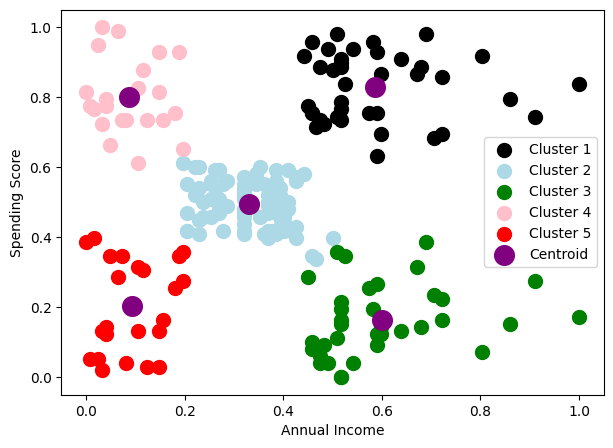

In [44]:
# Set the size of the plot for better visualization
plt.figure(figsize=(7, 5))  
# Why? Ensures the plot has appropriate dimensions to display all clusters and centroids clearly.

# Plot points for each cluster
# Cluster 1
plt.scatter(
    d_1['Annual_Income'], d_1['Spending_Score'],  
    c='black', s=100, label='Cluster 1'  
    # Black points represent Cluster 1; size set to 100 for visibility
)

# Cluster 2
plt.scatter(
    d_2['Annual_Income'], d_2['Spending_Score'],  
    c='lightblue', s=100, label='Cluster 2'  
    # Light blue points represent Cluster 2
)

# Cluster 3
plt.scatter(
    d_3['Annual_Income'], d_3['Spending_Score'],  
    c='green', s=100, label='Cluster 3'  
    # Green points represent Cluster 3
)

# Cluster 4
plt.scatter(
    d_4['Annual_Income'], d_4['Spending_Score'],  
    c='pink', s=100, label='Cluster 4'  
    # Pink points represent Cluster 4
)

# Cluster 5
plt.scatter(
    d_5['Annual_Income'], d_5['Spending_Score'],  
    c='red', s=100, label='Cluster 5'  
    # Red points represent Cluster 5
)

# Plot the centroids of all clusters
plt.scatter(
    k_mean.cluster_centers_[:, 0],  # X-coordinates of centroids
    k_mean.cluster_centers_[:, 1],  # Y-coordinates of centroids
    c='purple', s=200, label='Centroid'  
    # Centroids are shown as purple markers with a size of 200 for emphasis
)

# Add labels to the axes
plt.xlabel('Annual Income')  
# Why? Indicates the x-axis represents annual income values.
plt.ylabel('Spending Score')  
# Why? Indicates the y-axis represents spending score values.

# Add a legend to distinguish clusters and centroids
plt.legend()  
# Why? Explains the meaning of each color and marker in the plot.

# Display the plot
plt.show()  
# Why? Renders the scatter plot with clusters and centroids.
